In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

# **GOOGLE DATA ANALYTICS CAPSTONE PROJECT::::Bellabeat Case Study**

*This is part of the Data Analytics certification program from Google.  
**My name is Kola Ademola** and I'll be taking on this project to showcase what I have learnt so far from the program
and also add this project to my personal portfolio.  
I'm still learning and open to corrections as this may not be a perfect approach or analysis.  
I will be using the Ask, Prepare, Process, Analyse, Share and Act approach.  
Thank you all!!!*  

## Introduction
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart devicemarket. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.

#### Stakeholders
* **Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer**
* **Sando Mur: Mathematician and Bellabeat’s cofounder**

#### Products

* **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

* **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

* **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

* **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

## Business Task
* Analyze smart device usage data in order to gain insight into how customers use non-Bellabeat smart devices.
* Select one Bellabeat product to apply insights to in my presentation.

#### Key Questions
* What are some trends tin smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

## Data Source
*[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be u)sed to explore users’ habits.
*

## Installing Packages
I installed the neccessary packages for data cleaning and visualization that will be needed for this project.
* tidyverse
* ggplot2
* skimr
* dplyr
* janitor

In [2]:
library(tidyverse)
library(ggplot2)
library(skimr)
library(dplyr)
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Preparing and Importing the Datasets from FitBit

I'll be using the "daily" collected data on Activity, Calories, Intensities, Steps and Sleep and weight data for this analysis.  


In [3]:
daily_Activity <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_Calories <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_Intensities <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_Steps <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartRate_Seconds <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_Day <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_Log <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

## Processing the Data

In this phase I'll be checking the data to get some quick insights or summary on the daily_Activities, sleep_Day & weight_Log of the participants.  
And I'll also be processing the data and checking the data for integrity and cleaning also.  

In [4]:
head(daily_Activity)
colnames(daily_Activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [5]:
head(sleep_Day)
colnames(sleep_Day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [6]:
head(weight_Log)
colnames(weight_Log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

I checked how many unique participants were in the datasets/dataframe available to us.

In [7]:
n_distinct(daily_Activity$Id)
n_distinct(daily_Calories$Id)
n_distinct(daily_Intensities$Id)
n_distinct(daily_Steps$Id)
n_distinct(heartRate_Seconds$Id)
n_distinct(sleep_Day$Id)
n_distinct(weight_Log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 14

[1] 24

[1] 8

* **Daily** (Activities, Calories, Intensities and Step) 33 participants
* **Heartrate** 14 participants
* **Sleep Day** 24 participants
* **Weight Log** 8 participants  

***NB: The weight_Log data is not ideal for this analysis as the amount of participants is too small but  
I'll be using it anyways since Bellabeat focuses on women and women do care alot about their weight.***

**Next we'll look at how many observations there are in each of the dataframes.**

In [8]:
nrow(daily_Activity)
nrow(daily_Calories)
nrow(daily_Intensities)
nrow(daily_Steps)
nrow(heartRate_Seconds)
nrow(sleep_Day)
nrow(weight_Log)

[1] 940

[1] 940

[1] 940

[1] 940

[1] 2483658

[1] 413

[1] 67

## Analyzing The Data

In this phase I start the actual analysis on the data

### Quick Summary of the Dataframes

Here I'll be running a quick sumary statistics on the dataframes  
*NB: I'll be using the piping function for a much more readable code.*

In [9]:
daily_Activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

In [10]:
daily_Activity %>%  
  select(VeryActiveDistance,
         ModeratelyActiveDistance,
         LightActiveDistance,
             SedentaryActiveDistance) %>%
  summary()

 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945     
 Median : 0.210     Median :0.2400           Median : 3.365     
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341     
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :21.920     Max.   :6.4800           Max.   :10.710     
 SedentaryActiveDistance
 Min.   :0.000000       
 1st Qu.:0.000000       
 Median :0.000000       
 Mean   :0.001606       
 3rd Qu.:0.000000       
 Max.   :0.110000       

In [11]:
daily_Activity %>%  
  select(TotalSteps,
         TotalDistance,
         Calories) %>%
  summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

In [12]:
daily_Intensities %>%  
  select(SedentaryMinutes,
  LightlyActiveMinutes,
  FairlyActiveMinutes,
         VeryActiveMinutes) %>%
  summary()

 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   

In [13]:
sleep_Day %>%  
  select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [14]:
weight_Log %>%  
  select(WeightPounds,
  BMI) %>%
  summary()

  WeightPounds        BMI       
 Min.   :116.0   Min.   :21.45  
 1st Qu.:135.4   1st Qu.:23.96  
 Median :137.8   Median :24.39  
 Mean   :158.8   Mean   :25.19  
 3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :294.3   Max.   :47.54  

So from the above summary statistics, I noticed the average total steps are below the recommended 10,000 steps/day which is suggested for an average adult.  
Also which should note that a persons average daily amount of steps is usually based on the type of job they do as thiis can greatly affect their daily steps.  
For instance, a receptionist at a hotel would average less daily steps compared to delivery person or factory worker because they spend a significant amount of time on their feet. 

So generally it would be benefitial for the participants to increase their physical activity. As minor changes in their daily routine can increase their daily active minutes which would also lead to a significant decrease in their sedentary minutes. 

Below are a few ways we can increase our active minutes:
* Jogging
* Taking the stairs instead of the elevator
* Taking our pets on a walk 
* Parking further than usual at the mall or grocery store
* Bike riding or hiking on free time or weekends  
* Taking mini walks during lunch breaks

### Visualizing the Data

I'll be visualizing the data to get a clearer picture and see if theres possible correlations between some of the variables

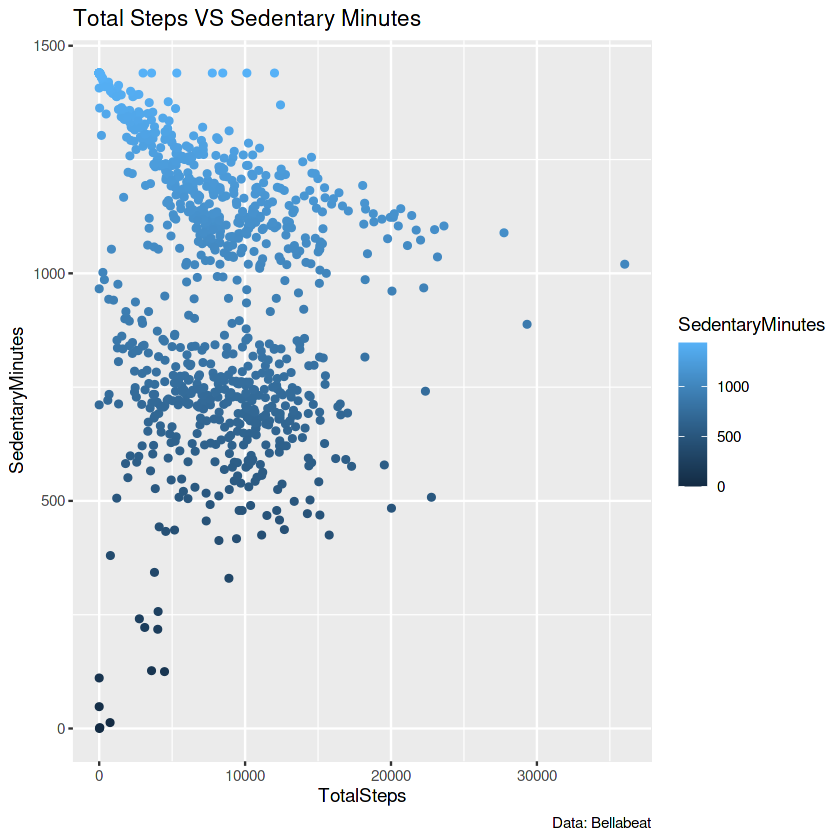

In [15]:
ggplot(data=daily_Activity, aes(x=TotalSteps, y=SedentaryMinutes, color=SedentaryMinutes)) + geom_point() +
labs(title= "Total Steps VS Sedentary Minutes", caption="Data: Bellabeat")

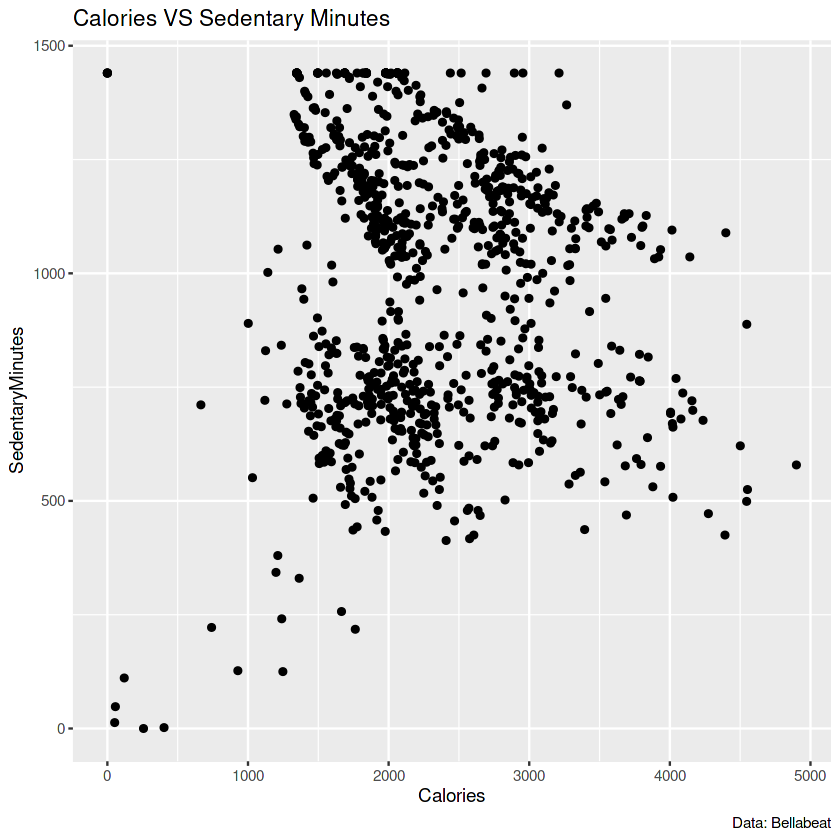

In [16]:
ggplot(data=daily_Activity, aes(x=Calories, y=SedentaryMinutes)) + geom_point() + 
labs(title = "Calories VS Sedentary Minutes", caption="Data: Bellabeat")

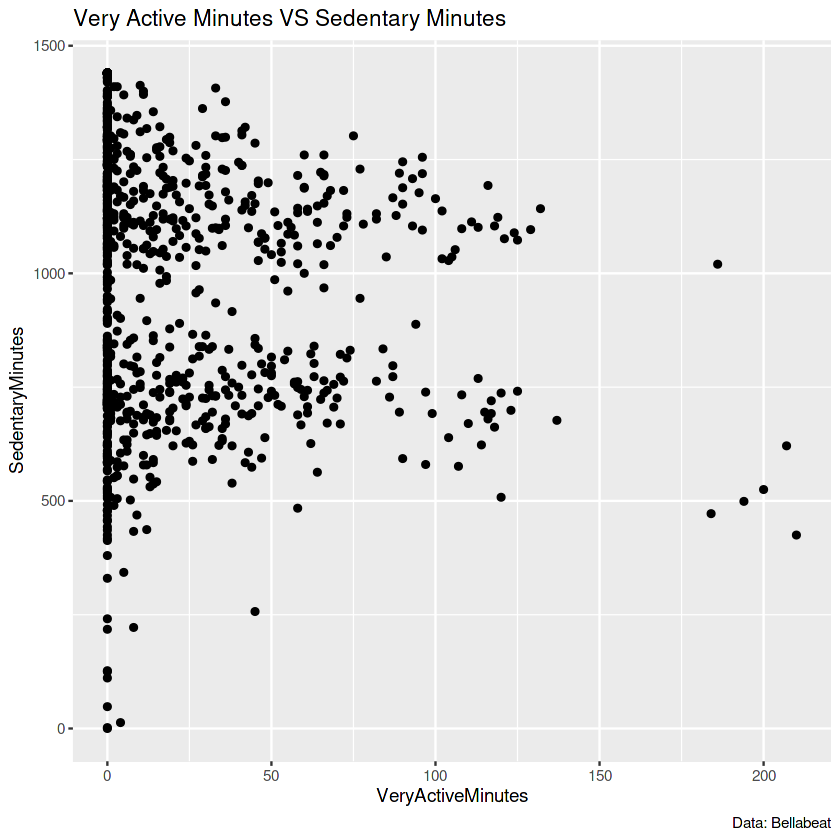

In [17]:
ggplot(data=daily_Activity, aes(x=VeryActiveMinutes, y=SedentaryMinutes)) + geom_point() + 
labs(title= "Very Active Minutes VS Sedentary Minutes", caption="Data: Bellabeat")

After careful look at the above visualizations its seen that Sedentary minutes are significantly higher than very active minutes. Its very obvious now that the users are spending more time idle/sitting and less time moving around.  
A good way to correct this will be creating a program/package on the app to encourage customers to stay active daily.   This plan should emphasize that the key to living healthier lifestyle is staying active.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



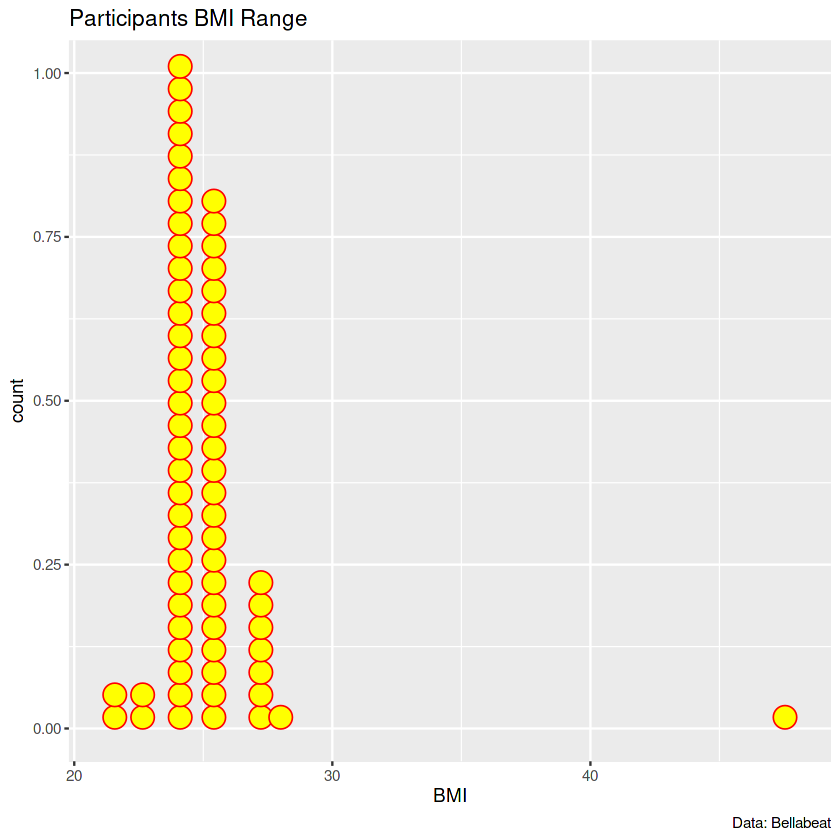

In [18]:
ggplot(data= weight_Log) + geom_dotplot(mapping = aes(x=BMI), color='red', fill= 'yellow') + 
labs(title= "Participants BMI Range", caption="Data: Bellabeat")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



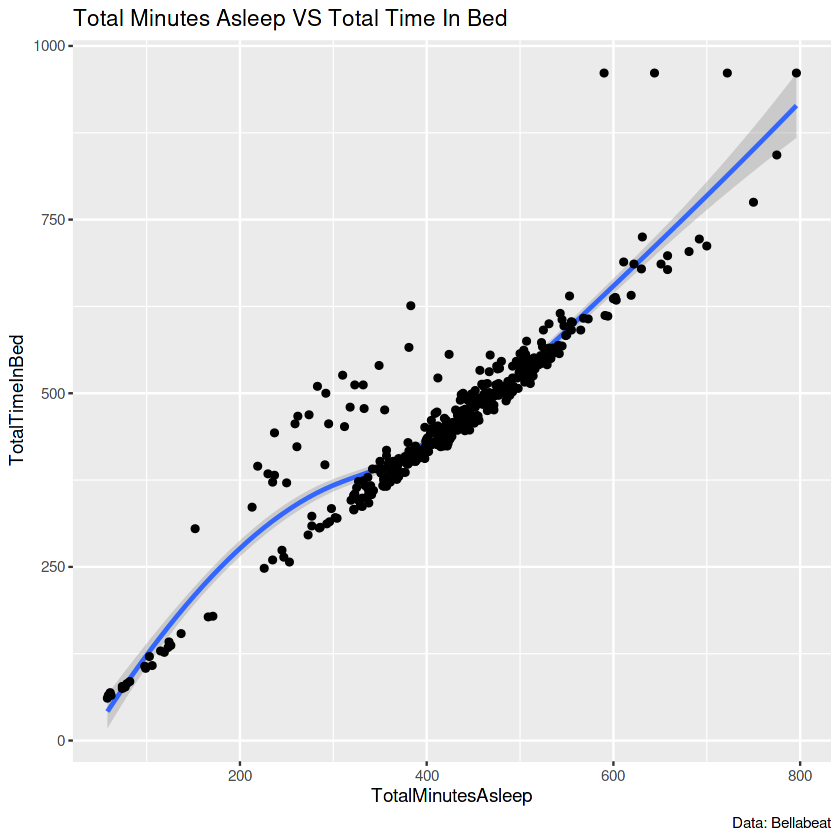

In [19]:
ggplot(data= sleep_Day) + geom_smooth(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
geom_point(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed))  + 
labs(title= "Total Minutes Asleep VS Total Time In Bed", caption="Data: Bellabeat")

There's a positive correlation between Total time in bed and Total minutes asleep. Bellabeats should consider providing personalized insights and tips to improve sleep quality. Another option Bellabeats should consider is allowing customers to set a bedtime in the Bellabeat app then the app would send daily notifications when it's bedtime. 


## Merging Datasets

In [20]:
sleep_daily_activity <- merge(sleep_Day, daily_Activity, by="Id")

In [21]:
head(sleep_daily_activity)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/6/2016,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/1/2016,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/30/2016,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797


#### making sure the coumns are correct

In [22]:
n_distinct(sleep_daily_activity$Id)

[1] 24

## Recommendations
From the above analysis and results, Bellabeat would benefit from improving their Bellabeat app. What they can do is make a feature that would encourage more active work time to encourage a healthier lifestyle by staying active. From the result of the analysis we can see that sedentary minutes are significantly higher than total steps. This means majority of particpants are lightly active and not getting as much steps as they should to benefit their health. Also the average adult should be taking not less than 10,000 steps a day and the participants averaged under 8,000 a day. Adding some new features to the Bellabeat app would motivate customers to get active.

Upgrades Bellabeat should consider adding to the Bellabeat app:

* Healthy food recipes/plans.
* Daily and Weekly activity ch0allenges which motivates users.
* Partnerships with fitness companies that offers virtual class via the app.
* Daily step quotas to ensure users have at least 10,000 daily steps.
* Bedtime reminders and sleep quality scores.
* Hourly activity notification to help them stay active.